# Tuning analysis

In [1]:
from pathlib import Path
from tqdm.auto import tqdm

import pandas as pd
import geopandas as gpd
import numpy as np
import seaborn as sns
import shapely
from matplotlib import pyplot as plt

from ship_routing.app.routing import RoutingResult, RoutingLog
import msgpack
from tqdm.auto import tqdm

import warnings
warnings.filterwarnings("ignore")

In [2]:
df_full = gpd.read_parquet("results/results_prelim.pq")
df_full

,hyper_population_size,hyper_random_seed,hyper_selection_acceptance_rate_warmup,hyper_mutation_width_fraction_warmup,hyper_mutation_displacement_fraction_warmup,hyper_generations,hyper_offspring_size,hyper_crossover_rounds,hyper_selection_quantile,hyper_selection_acceptance_rate,...,journey_speed_knots,journey_time_resolution_hours,n_elite,elite_length_meters,elite_length_relative,elite_cost_absolute,elite_cost_relative,geometry,runtime,runtime_seconds
filename,,,,,,,,,,,,,,,,,,,,,
result:2025-12-07T16-56-36.757_0e5697e0-5398-4660-b663-b04a022826f7,128,873099866,0.3,0.5,0.25,2,128,2,0.10,0.00,...,8.0,6.0,0,6.669596e+06,1.094571,4.066439e+12,0.000000,"LINESTRING (-11 50, -12.23211 50.0744, -13.445...",0 days 00:09:08,548.0
result:2025-12-07T16-56-36.757_0e5697e0-5398-4660-b663-b04a022826f7,128,873099866,0.3,0.5,0.25,2,128,2,0.10,0.00,...,8.0,6.0,1,6.669596e+06,1.094571,4.066439e+12,0.000000,"LINESTRING (-11 50, -12.23211 50.0744, -13.445...",0 days 00:09:08,548.0
result:2025-12-07T15-36-12.231_cd880a65-e065-4c65-98e6-bd5ec466f3c5,32,3350351751,0.3,0.9,0.10,4,32,0,0.25,0.25,...,8.0,6.0,0,6.232840e+06,1.022893,3.492474e+12,0.837494,"LINESTRING (-80.5 30, -79.83206 30.53642, -79....",0 days 00:02:14,134.0
result:2025-12-07T15-36-12.231_cd880a65-e065-4c65-98e6-bd5ec466f3c5,32,3350351751,0.3,0.9,0.10,4,32,0,0.25,0.25,...,8.0,6.0,1,6.232840e+06,1.022893,3.492474e+12,0.837494,"LINESTRING (-80.5 30, -79.83206 30.53642, -79....",0 days 00:02:14,134.0
result:2025-12-07T15-42-46.518_2565350a-e103-4acb-b095-630db0537e91,32,2927675122,0.3,0.9,0.10,4,32,0,0.25,0.00,...,8.0,6.0,0,6.125217e+06,1.005231,3.560042e+12,0.853697,"LINESTRING (-80.5 30, -79.83908 30.54047, -79....",0 days 00:02:17,137.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
result:2025-12-07T15-46-16.704_3fad20bc-4cc3-469e-9083-5ad04487e73a,32,3664411725,0.3,0.5,0.25,1,32,0,0.25,0.00,...,12.0,6.0,0,6.104139e+06,1.001772,1.071089e+13,0.899850,"LINESTRING (-80.5 30, -79.49115 30.81262, -78....",0 days 00:01:10,70.0
result:2025-12-07T15-46-16.704_3fad20bc-4cc3-469e-9083-5ad04487e73a,32,3664411725,0.3,0.5,0.25,1,32,0,0.25,0.00,...,12.0,6.0,1,6.104139e+06,1.001772,1.071089e+13,0.899850,"LINESTRING (-80.5 30, -79.49115 30.81262, -78....",0 days 00:01:10,70.0
result:2025-12-07T16-10-30.656_f9222e90-08e1-4d29-8b63-21d0838c982a,128,817024641,0.3,0.5,0.10,4,128,0,0.10,0.25,...,12.0,6.0,0,6.093342e+06,1.000000,NaN,NaN,"LINESTRING (-80.5 30, -79.4778 30.80166, -78.4...",0 days 00:01:14,74.0


In [3]:
df_full = df_full.assign(seed_cost=(df_full.elite_cost_absolute / df_full.elite_cost_relative).fillna(np.inf))

In [4]:
df = df_full.where(
    (df_full.elite_cost_relative > 0)
    & (df_full.elite_length_relative > 1 + 1e-3)
).dropna()
df

,hyper_population_size,hyper_random_seed,hyper_selection_acceptance_rate_warmup,hyper_mutation_width_fraction_warmup,hyper_mutation_displacement_fraction_warmup,hyper_generations,hyper_offspring_size,hyper_crossover_rounds,hyper_selection_quantile,hyper_selection_acceptance_rate,...,journey_time_resolution_hours,n_elite,elite_length_meters,elite_length_relative,elite_cost_absolute,elite_cost_relative,geometry,runtime,runtime_seconds,seed_cost
filename,,,,,,,,,,,,,,,,,,,,,
result:2025-12-07T15-36-12.231_cd880a65-e065-4c65-98e6-bd5ec466f3c5,32.0,3.350352e+09,0.3,0.9,0.10,4.0,32.0,0.0,0.25,0.25,...,6.0,0.0,6.232840e+06,1.022893,3.492474e+12,0.837494,"LINESTRING (-80.5 30, -79.83206 30.53642, -79....",0 days 00:02:14,134.0,4.170147e+12
result:2025-12-07T15-36-12.231_cd880a65-e065-4c65-98e6-bd5ec466f3c5,32.0,3.350352e+09,0.3,0.9,0.10,4.0,32.0,0.0,0.25,0.25,...,6.0,1.0,6.232840e+06,1.022893,3.492474e+12,0.837494,"LINESTRING (-80.5 30, -79.83206 30.53642, -79....",0 days 00:02:14,134.0,4.170147e+12
result:2025-12-07T15-42-46.518_2565350a-e103-4acb-b095-630db0537e91,32.0,2.927675e+09,0.3,0.9,0.10,4.0,32.0,0.0,0.25,0.00,...,6.0,0.0,6.125217e+06,1.005231,3.560042e+12,0.853697,"LINESTRING (-80.5 30, -79.83908 30.54047, -79....",0 days 00:02:17,137.0,4.170147e+12
result:2025-12-07T15-42-46.518_2565350a-e103-4acb-b095-630db0537e91,32.0,2.927675e+09,0.3,0.9,0.10,4.0,32.0,0.0,0.25,0.00,...,6.0,1.0,6.125217e+06,1.005231,3.560042e+12,0.853697,"LINESTRING (-80.5 30, -79.83908 30.54047, -79....",0 days 00:02:17,137.0,4.170147e+12
result:2025-12-07T15-16-59.882_7f68ee37-80c3-4c13-8749-ad1596bb10a6,128.0,1.474779e+09,0.3,0.9,0.25,2.0,128.0,0.0,0.10,0.00,...,6.0,0.0,6.159085e+06,1.010789,3.406172e+12,0.816799,"LINESTRING (-80.5 30, -79.82904 30.53548, -79....",0 days 00:06:47,407.0,4.170147e+12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
result:2025-12-07T16-53-14.613_771c3f35-0a67-412a-9bc8-7d1b72df5267,128.0,3.815681e+09,0.3,0.9,0.25,4.0,128.0,0.0,0.10,0.25,...,6.0,1.0,6.103578e+06,1.001680,8.841659e+12,0.939179,"LINESTRING (-11 50, -12.84094 50.11695, -14.68...",0 days 00:04:51,291.0,9.414248e+12
result:2025-12-07T15-46-16.704_3fad20bc-4cc3-469e-9083-5ad04487e73a,32.0,3.664412e+09,0.3,0.5,0.25,1.0,32.0,0.0,0.25,0.00,...,6.0,0.0,6.104139e+06,1.001772,1.071089e+13,0.899850,"LINESTRING (-80.5 30, -79.49115 30.81262, -78....",0 days 00:01:10,70.0,1.190297e+13
result:2025-12-07T15-46-16.704_3fad20bc-4cc3-469e-9083-5ad04487e73a,32.0,3.664412e+09,0.3,0.5,0.25,1.0,32.0,0.0,0.25,0.00,...,6.0,1.0,6.104139e+06,1.001772,1.071089e+13,0.899850,"LINESTRING (-80.5 30, -79.49115 30.81262, -78....",0 days 00:01:10,70.0,1.190297e+13


In [5]:
df.columns

Index(['hyper_population_size', 'hyper_random_seed',
       'hyper_selection_acceptance_rate_warmup',
       'hyper_mutation_width_fraction_warmup',
       'hyper_mutation_displacement_fraction_warmup', 'hyper_generations',
       'hyper_offspring_size', 'hyper_crossover_rounds',
       'hyper_selection_quantile', 'hyper_selection_acceptance_rate',
       'hyper_mutation_width_fraction', 'hyper_mutation_displacement_fraction',
       'hyper_mutation_iterations', 'hyper_crossover_strategy',
       'hyper_ignore_hazards', 'hyper_num_elites', 'hyper_gd_iterations',
       'hyper_learning_rate_time', 'hyper_learning_rate_space',
       'hyper_time_increment', 'hyper_distance_increment', 'hyper_num_workers',
       'hyper_executor_type', 'journey_name', 'journey_lon_waypoints',
       'journey_lat_waypoints', 'journey_time_start', 'journey_time_end',
       'journey_speed_knots', 'journey_time_resolution_hours', 'n_elite',
       'elite_length_meters', 'elite_length_relative', 'elite_cost_a

<Axes: xlabel='journey_name', ylabel='journey_speed_knots-hyper_ignore_hazards'>

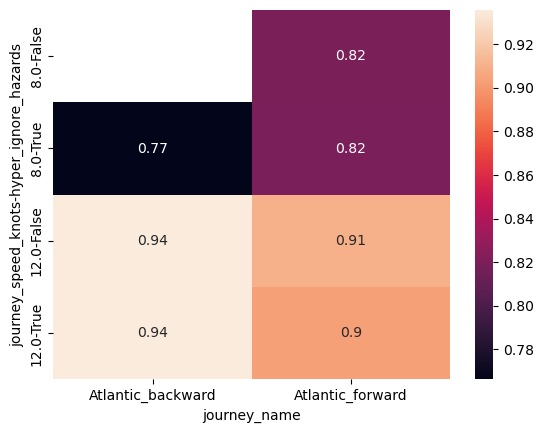

In [6]:
sns.heatmap(
    (df.groupby(["journey_name", "journey_speed_knots", "hyper_ignore_hazards"]).elite_cost_relative.median().unstack(0)),
    annot=True,
)

<Axes: xlabel='journey_name-hyper_ignore_hazards', ylabel='journey_speed_knots'>

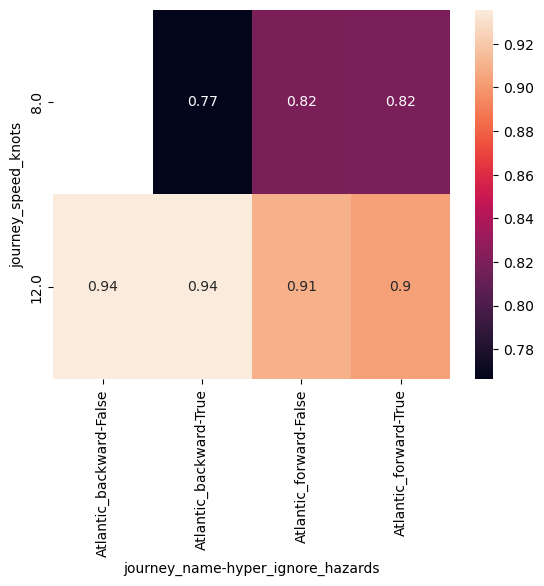

In [7]:
sns.heatmap(
    (df.groupby(
        ["journey_name", "journey_speed_knots", "hyper_ignore_hazards"]
    ).elite_cost_relative.median().unstack(0).unstack(-1)),
    annot=True,
)

<Axes: xlabel='hyper_crossover_strategy-hyper_population_size', ylabel='journey_name-journey_speed_knots-hyper_ignore_hazards'>

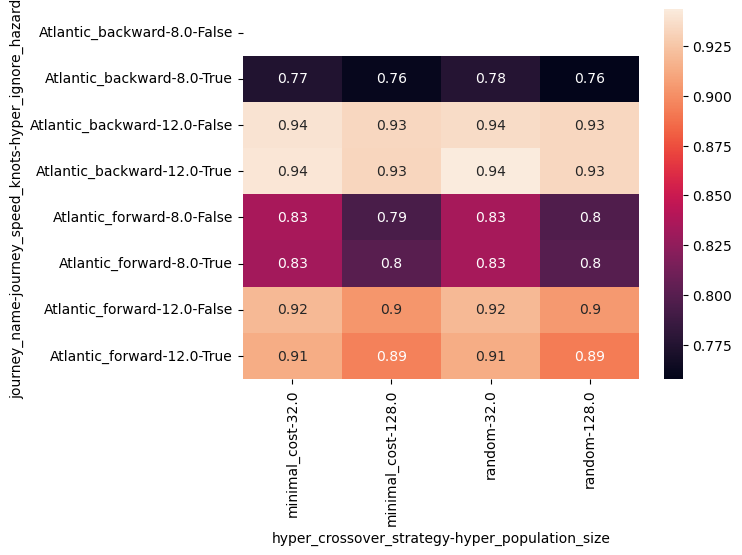

In [8]:
sns.heatmap(
    (df.groupby(
        ["hyper_population_size", "hyper_crossover_strategy", "journey_name", "journey_speed_knots", "hyper_ignore_hazards"]
    ).elite_cost_relative.median().unstack(1).unstack(0)),
    annot=True,
)

<Axes: xlabel='hyper_population_size-hyper_crossover_strategy', ylabel='journey_name-journey_speed_knots-hyper_ignore_hazards'>

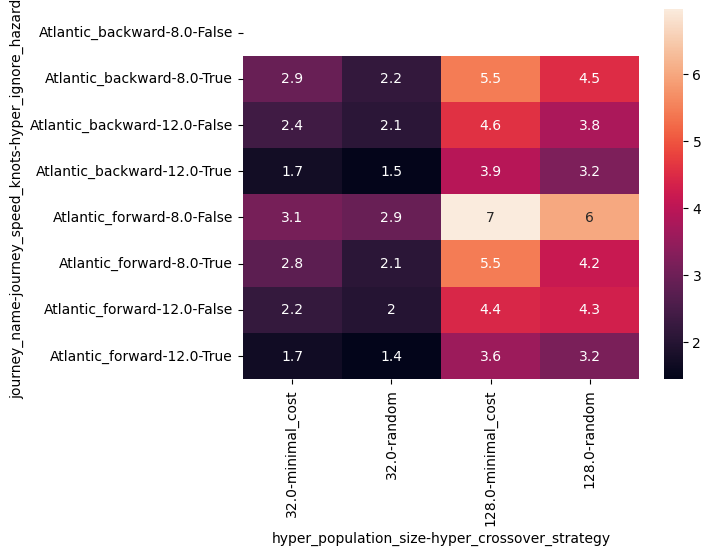

In [9]:
sns.heatmap(
    (df.groupby(
        ["hyper_population_size", "hyper_crossover_strategy", "journey_name", "journey_speed_knots", "hyper_ignore_hazards"]
    ).runtime_seconds.median().unstack(0).unstack(0) / 60),
    annot=True,
)

<Axes: xlabel='hyper_crossover_strategy-seed_cost', ylabel='hyper_population_size-journey_name-journey_speed_knots-hyper_ignore_hazards'>

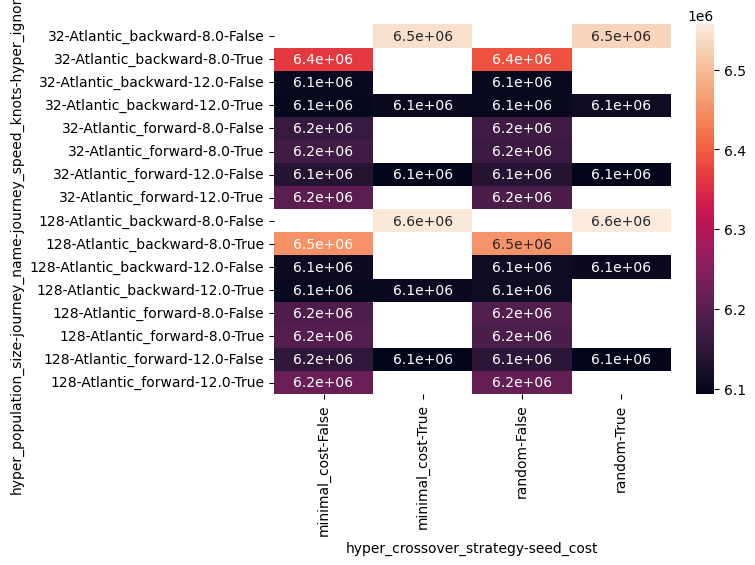

In [10]:
sns.heatmap(
    (df_full.groupby(
        [
            "hyper_population_size", "hyper_crossover_strategy", "journey_name", "journey_speed_knots", "hyper_ignore_hazards",
            np.isinf(df_full.seed_cost)
        ]
    ).elite_length_meters.mean().unstack(1).unstack(-1)),
    annot=True,
)

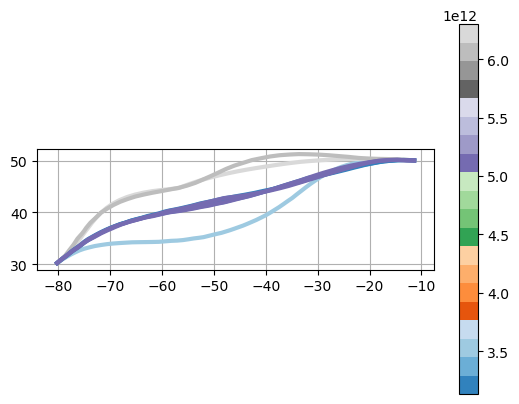

In [12]:
ax = df.sort_values(by="elite_cost_absolute").reset_index().groupby(
    ["journey_name", "journey_speed_knots", "hyper_ignore_hazards"]
).first().plot(column="elite_cost_absolute", alpha=1, cmap="tab20c", linewidth=3, legend=True)
ax.grid()